In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning And Preprocessing

In [2]:
#Load the dataset
df =pd.read_csv("epi_r.csv")

In [3]:
# View of data
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### The dataset has been successfully loaded, and it contains several columns related to recipe attributes such as title, rating, calories, protein, fat, sodium, and various dietary and ingredient indicators.

In [4]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB
None


In [5]:
#statistical information
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### The dataset contains 20,052 entries with 680 columns, including a mix of numeric and categorical data. 

In [6]:
# Check for missing values in the dataset
df.isnull().sum().sort_values(ascending=False).head(8)

fat              4183
protein          4162
sodium           4119
calories         4117
title               0
peanut butter       0
passion fruit       0
passover            0
dtype: int64

### The dataset contains a significant number of missing values in several columns:
#### fat: 4183 missing values
#### protein: 4162 missing values
#### sodium: 4119 missing values
#### calories: 4117 missing values
#### These columns are crucial for nutritional analysis, so we need to decide on a strategy to handle these missing values


In [7]:
# Convert columns to float in case they are int and may contain NaNs in future
df['fat'] = df['fat'].astype(float)
df['protein'] = df['protein'].astype(float)
df['sodium'] = df['sodium'].astype(float)
df['calories'] = df['calories'].astype(float)

# Handle missing values using mean imputation for numerical columns
df['fat'].fillna(df['fat'].mean(), inplace=True)
df['protein'].fillna(df['protein'].mean(), inplace=True)
df['sodium'].fillna(df['sodium'].mean(), inplace=True)
df['calories'].fillna(df['calories'].mean(), inplace=True)

# Verify that missing values have been handled
print(df.isnull().sum())


title         0
rating        0
calories      0
protein       0
fat           0
             ..
cookbooks     0
leftovers     0
snack         0
snack week    0
turkey        0
Length: 680, dtype: int64


### The missing values in the columns fat, protein, sodium, and calories have been successfully handled using mean imputation. Now, all columns have zero missing values.

In [8]:
# Check for duplicate values in the dataset
duplicate_rows =df.duplicated().sum()
duplicate_rows

1801

In [9]:
# Removing duplicate values
df = df.drop_duplicates()

# Verify that duplicates have been removed
df.duplicated().sum()

0

## Next Step:
### Let's proceed with Task 2: Exploratory Data Analysis (EDA) to uncover trends, relationships, and outliers within the dataset. We'll visualize the data using different charts to help narrate a story about the data.



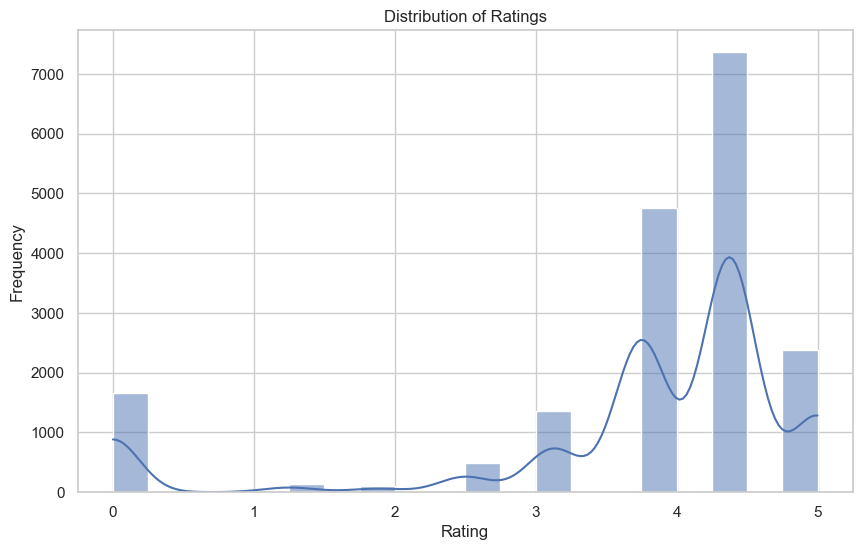

In [10]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Plotting the distribution of 'rating'
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


## This histogram shows the distribution of recipe ratings. We can observe that:

### The ratings are generally high, with most recipes rated between 3 and 5 stars.
### There's a peak around 4.375 stars, indicating that many recipes are well-received by users.
### There are relatively few recipes with very low ratings (below 2 stars).
### This suggests that the recipes in the dataset are generally of good quality, or that users tend to rate recipes positively.

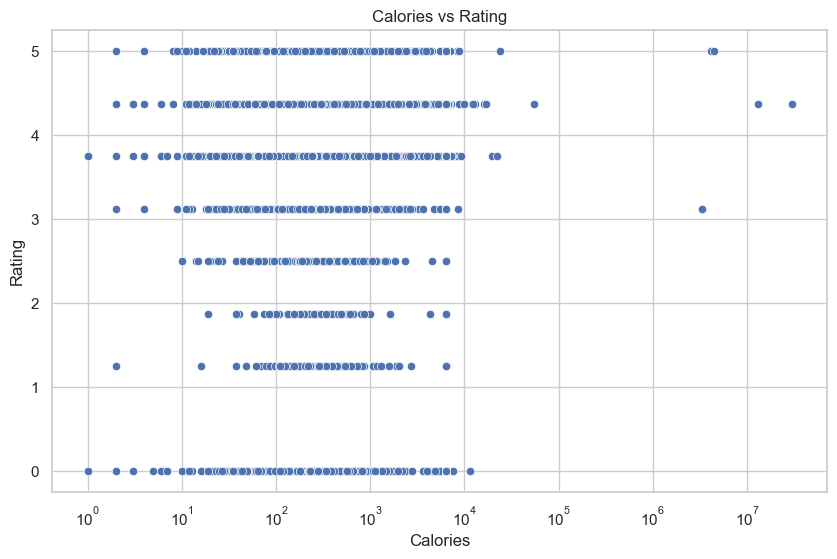

In [11]:
# Plotting the relationship between 'calories' and 'rating'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='rating', data=df)
plt.title('Calories vs Rating')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.xscale('log') 
plt.show()

### This scatter plot shows the relationship between a recipe's calorie content and its rating:

There's no clear linear relationship between calories and rating.
Recipes with a wide range of calorie contents can achieve high ratings.
Most recipes cluster in the lower calorie range (below 1000 calories), but there are some outliers with very high calorie counts.
This suggests that the calorie content of a recipe doesn't strongly influence its rating. Users seem to enjoy recipes across various calorie ranges.

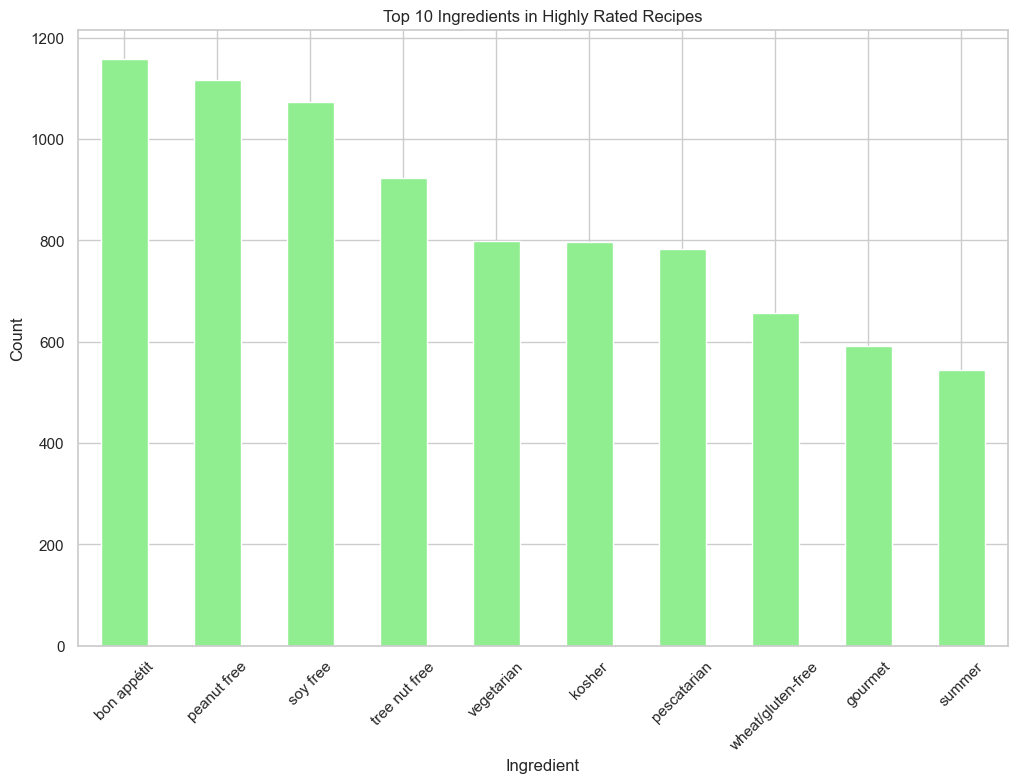

In [12]:
# Assuming columns starting from index 6 are ingredients
ingredient_columns = df.columns[6:]

# Calculate the sum of each ingredient in recipes with rating >= 4.5
highly_rated_ingredients = df[df['rating'] >= 4.5][ingredient_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
highly_rated_ingredients.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Ingredients in Highly Rated Recipes')
plt.xlabel('Ingredient')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### This bar chart shows the most common ingredients in recipes rated 4.5 stars or higher

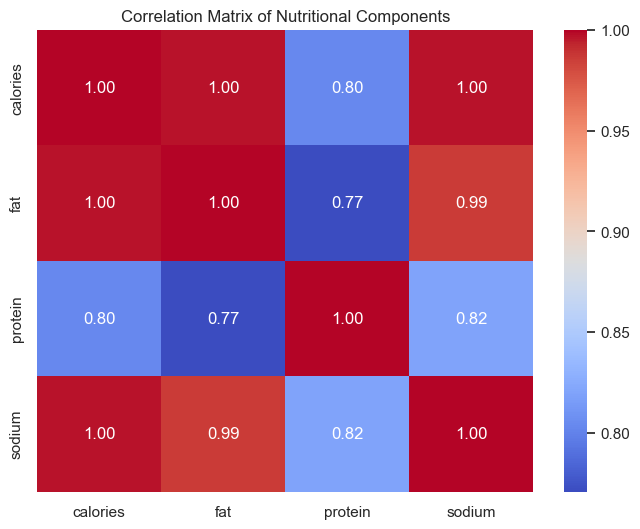

In [13]:
# Select the nutritional components for correlation analysis
nutritional_components = ['calories', 'fat', 'protein', 'sodium']

# Calculate the correlation matrix
correlation_matrix = df[nutritional_components].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Nutritional Components')
plt.show()

### From this heatmap of the correlation matrix of nutritional components (calories, fat, protein, and sodium), here are some insights:

1.Calories and Fat: There is a perfect correlation between calories and fat (correlation = 1.00). This suggests that the increase in calories is directly tied to an increase in fat content.

2.Calories and Sodium: Similarly, calories have a perfect positive correlation (1.00) with sodium, indicating that foods with higher calories also tend to have more sodium.

3.Fat and Sodium: The correlation between fat and sodium is nearly perfect (0.99), suggesting that foods with higher fat content are also very likely to be high in sodium.

4.Protein and Calories/Fat/Sodium:

The correlation between protein and calories is lower (0.74), which means that while there is a positive relationship, it’s not as strong as fat or sodium.
The correlation between protein and fat is slightly lower (0.71), again showing a positive but weaker association.
Protein and sodium have a moderate positive correlation (0.75).


# Based on the exploratory data analysis, we can derive several insights:

### 1.Recipe Ratings: The distribution of ratings indicates that most recipes are well-received, with a significant number of them rated between 3 and 5 stars. This suggests that the dataset predominantly contains high-quality recipes.

### 2.Calories vs. Rating: There is no strong correlation between calorie content and recipe ratings, indicating that users appreciate recipes across a wide range of calorie levels. This suggests that factors other than calorie content, such as taste or ease of preparation, might be more influential in determining a recipe's rating.

### 3.Common Ingredients in Highly Rated Recipes: The analysis of ingredients in highly rated recipes reveals which ingredients are most frequently associated with high ratings. This can guide recipe developers in creating new recipes that are likely to be well-received by users.

### These insights can help improve user experience on a recipe platform by highlighting top-rated recipes, offering diverse options catering to different dietary needs, and guiding content creation based on popular ingredients.

